### 张量拼接与切分

In [1]:
import torch

t = torch.ones(2, 2)
t_0 = torch.cat([t, t], dim=0)
t_1 = torch.cat([t, t], dim=1)
t, t_0, t_1

(tensor([[1., 1.],
         [1., 1.]]),
 tensor([[1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.]]),
 tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.]]))

In [2]:
# stack:在新的维度上拼接张量
t_stack = torch.stack([t, t], dim=2)
t_stack, t_stack.shape

(tensor([[[1., 1.],
          [1., 1.]],
 
         [[1., 1.],
          [1., 1.]]]),
 torch.Size([2, 2, 2]))

In [3]:
# chunk：若不能整除则最后一份张量小于其他张量
a = torch.ones(2,5)
list_of_tensors = torch.chunk(a, dim=1, chunks=2)
for idx, t in enumerate(list_of_tensors):
    print(f"idx {idx} : {t}")

idx 0 : tensor([[1., 1., 1.],
        [1., 1., 1.]])
idx 1 : tensor([[1., 1.],
        [1., 1.]])


In [5]:
# split:指定长度拆分
list_of_tensors = torch.split(a, split_size_or_sections=2, dim=1)
for idx, t in enumerate(list_of_tensors):
    print(f"idx {idx} : {t}")
list_2 = torch.split(a, split_size_or_sections=[2, 1, 2], dim=1)
for idx, t in enumerate(list_2):
    print(f"idx {idx} : {t}")

idx 0 : tensor([[1., 1.],
        [1., 1.]])
idx 1 : tensor([[1., 1.],
        [1., 1.]])
idx 2 : tensor([[1.],
        [1.]])
idx 0 : tensor([[1., 1.],
        [1., 1.]])
idx 1 : tensor([[1.],
        [1.]])
idx 2 : tensor([[1., 1.],
        [1., 1.]])


In [6]:
# 张量的索引
# torch.index_select(input, dim, index)
t = torch.randint(0, 9, size=(3, 3))
idx = torch.tensor([0, 2], dtype=torch.long)
t_select = torch.index_select(t, dim=0, index=idx)
t, t_select

(tensor([[6, 3, 8],
         [7, 4, 6],
         [6, 4, 1]]),
 tensor([[6, 3, 8],
         [6, 4, 1]]))

In [7]:
# mask_select:根据掩码张量的值来选择张量中的元素
mask = t.ge(5)  # 是基于张量 t 中元素是否大于等于 5 来创建一个布尔类型的掩码是基于张量 t 中元素是否大于等于 5 来创建一个布尔类型的掩码
t_select = torch.masked_select(t, mask)
print(t, mask, t_select)

tensor([[6, 3, 8],
        [7, 4, 6],
        [6, 4, 1]]) tensor([[ True, False,  True],
        [ True, False,  True],
        [ True, False, False]]) tensor([6, 8, 7, 6, 6])


In [11]:
# 张量变换
# reshape:改变张量的形状
t = torch.randperm(8)
t_reshape = torch.reshape(t, (2, 4))
t_reshape_2 = t.reshape(-1, 2, 2)
t_reshape, t_reshape_2

(tensor([[2, 6, 0, 5],
         [3, 4, 1, 7]]),
 tensor([[[2, 6],
          [0, 5]],
 
         [[3, 4],
          [1, 7]]]))

In [12]:
# transpose:交换张量的两个维度
# torch.t:只能用于交换两个维度的张量
t = torch.rand((2, 3, 4))
t_transpose = torch.transpose(t, dim0=1, dim1=2)
t, t_transpose

(tensor([[[0.1423, 0.5415, 0.3097, 0.9916],
          [0.5689, 0.9851, 0.9477, 0.2204],
          [0.5119, 0.1158, 0.5914, 0.8509]],
 
         [[0.1741, 0.2949, 0.4263, 0.7981],
          [0.0098, 0.5906, 0.3017, 0.7418],
          [0.2713, 0.2801, 0.4413, 0.9453]]]),
 tensor([[[0.1423, 0.5689, 0.5119],
          [0.5415, 0.9851, 0.1158],
          [0.3097, 0.9477, 0.5914],
          [0.9916, 0.2204, 0.8509]],
 
         [[0.1741, 0.0098, 0.2713],
          [0.2949, 0.5906, 0.2801],
          [0.4263, 0.3017, 0.4413],
          [0.7981, 0.7418, 0.9453]]]))

In [13]:
# squeeze:去除维度为 1 的维度
t = torch.rand((1, 2, 3, 1))
t_squeeze = torch.squeeze(t)
t_0 = torch.squeeze(t, dim=0)
t_1 = torch.squeeze(t, dim=1)
t.shape, t_squeeze.shape, t_0.shape, t_1.shape

(torch.Size([1, 2, 3, 1]),
 torch.Size([2, 3]),
 torch.Size([2, 3, 1]),
 torch.Size([1, 2, 3, 1]))

In [16]:
# torch.mm:矩阵乘法
t1 = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
t2 = torch.tensor([[9, 8], [7, 6]], dtype=torch.float32)
t_mm = torch.mm(t1, t2)
t_mm

tensor([[23., 20.],
        [55., 48.]])

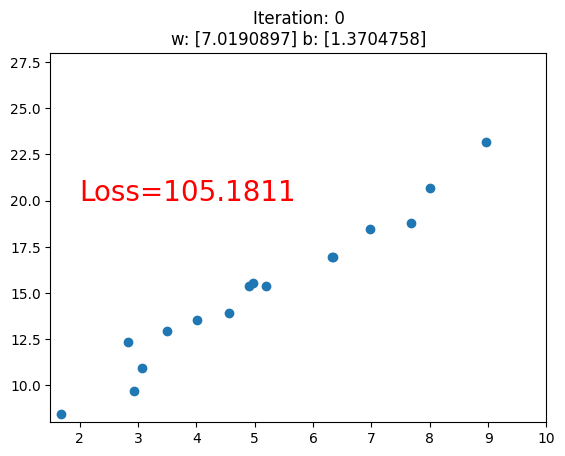

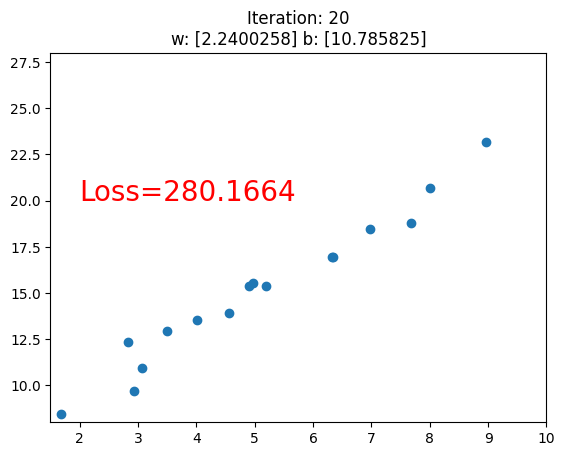

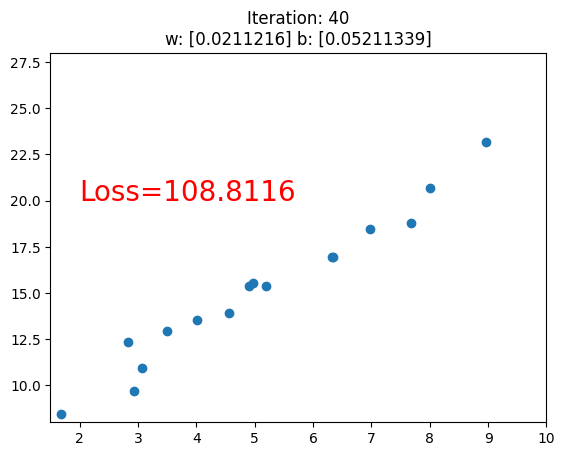

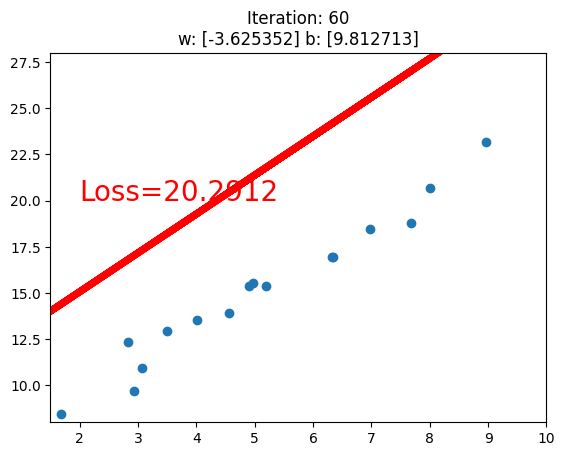

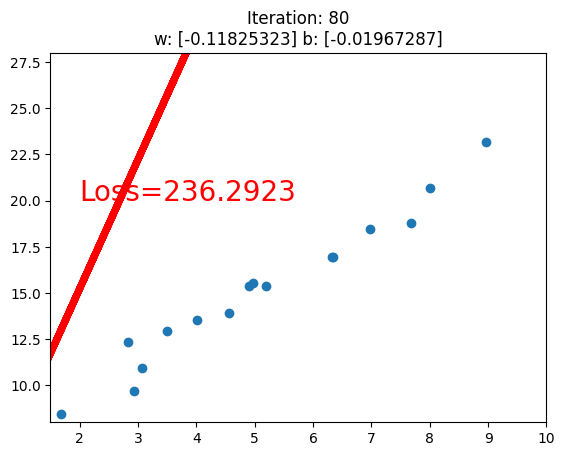

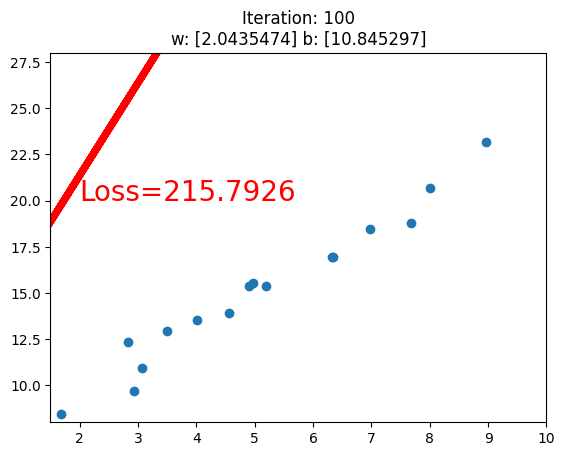

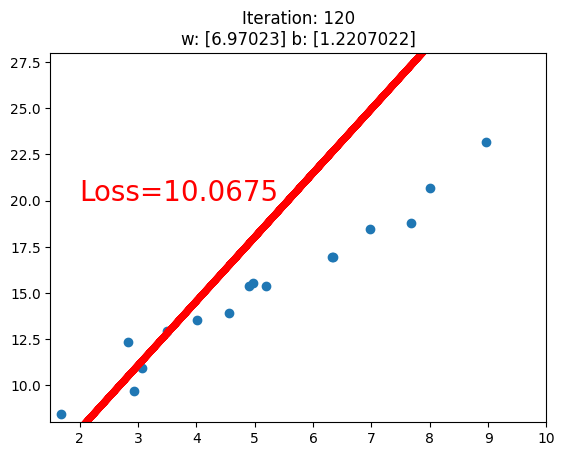

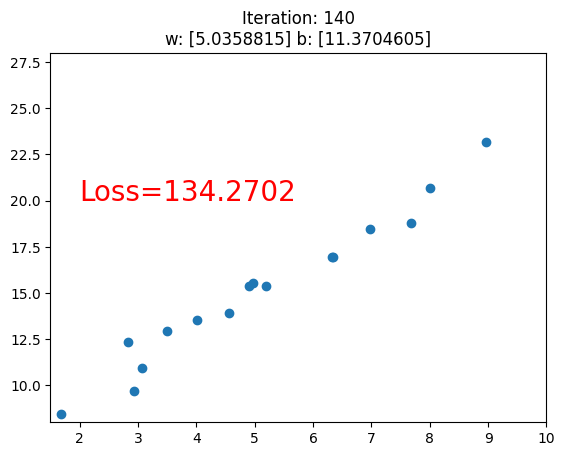

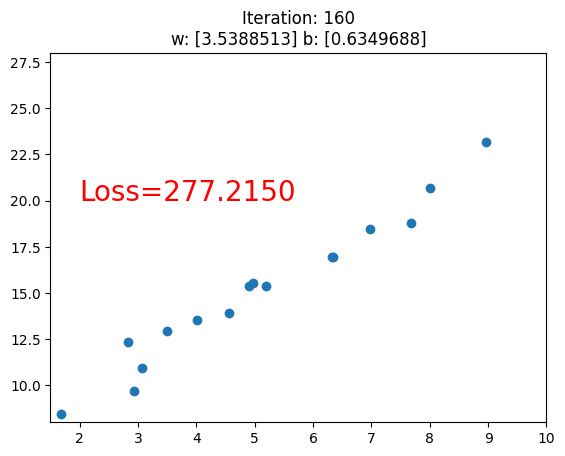

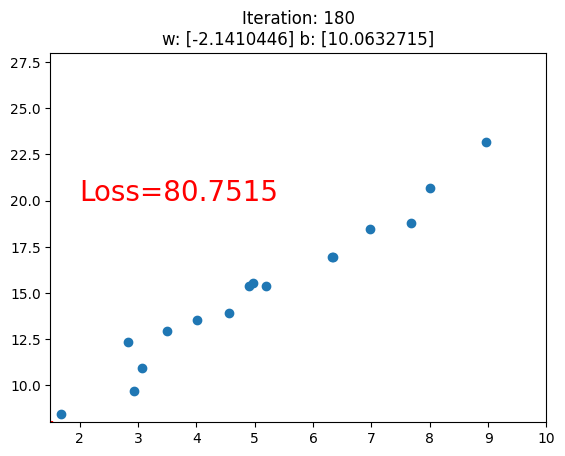

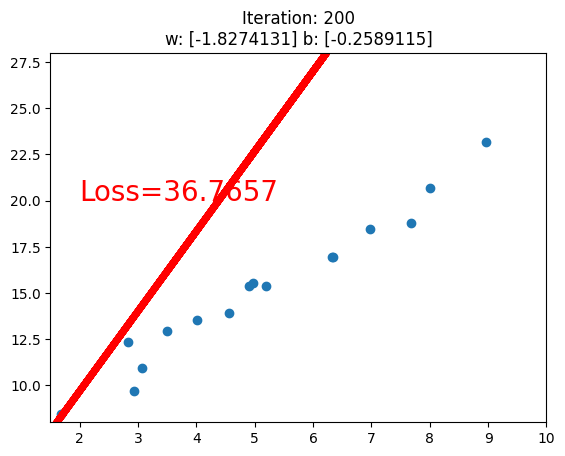

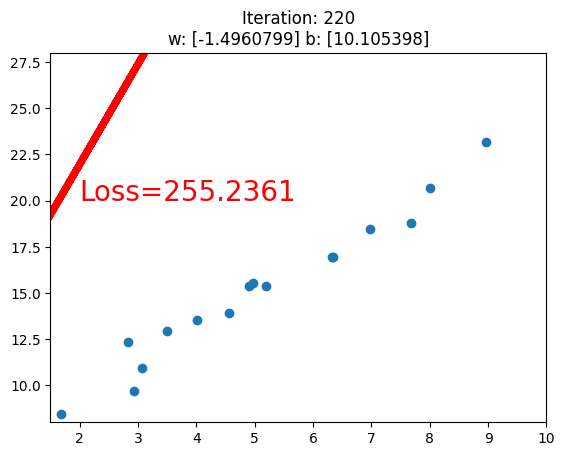

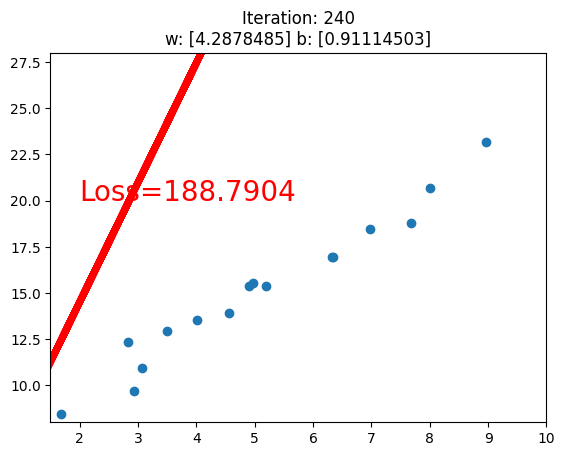

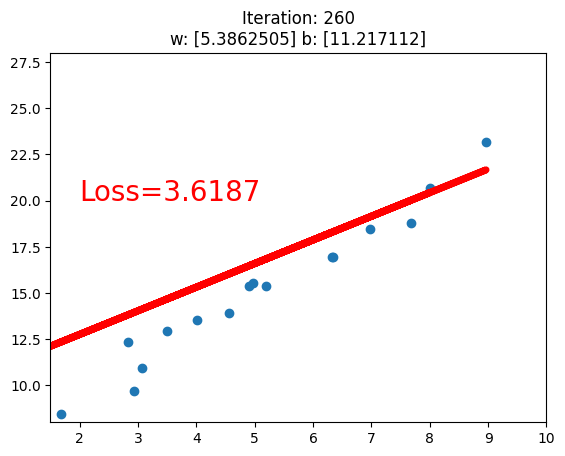

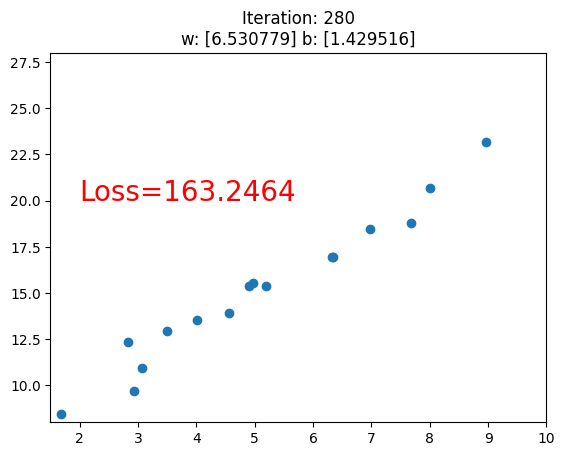

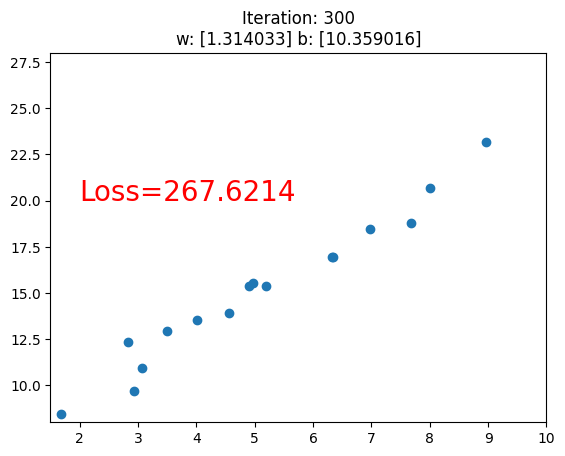

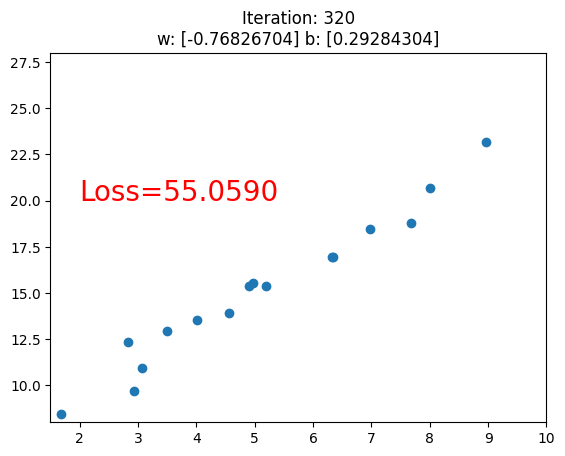

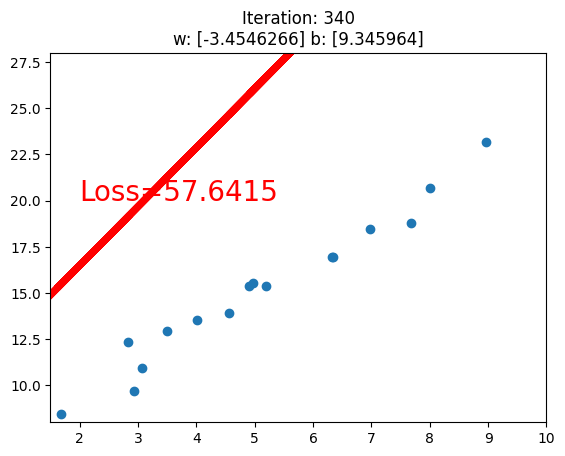

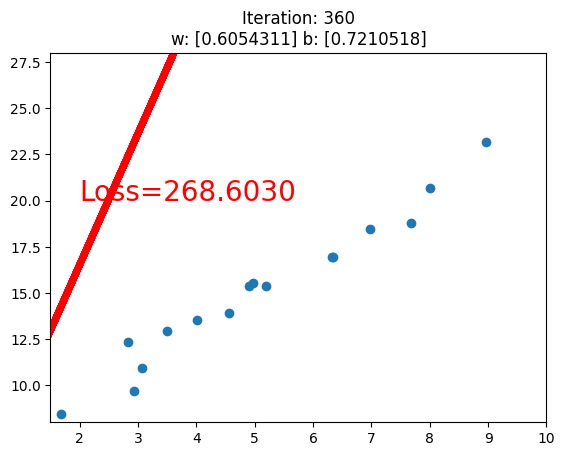

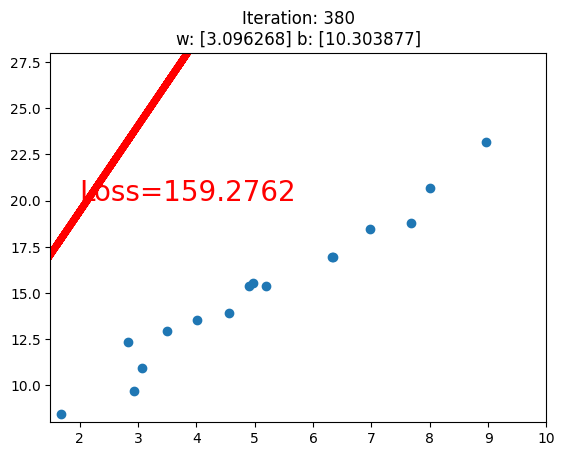

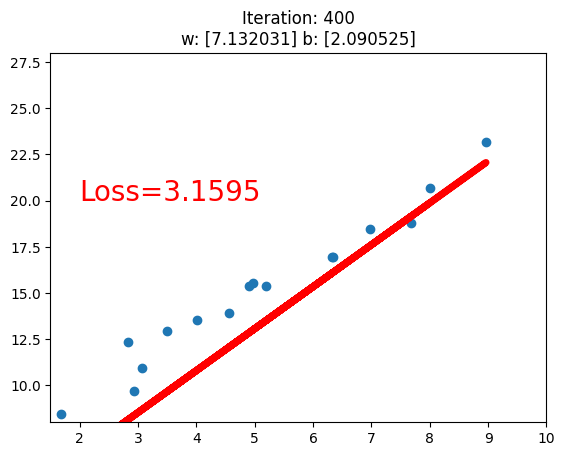

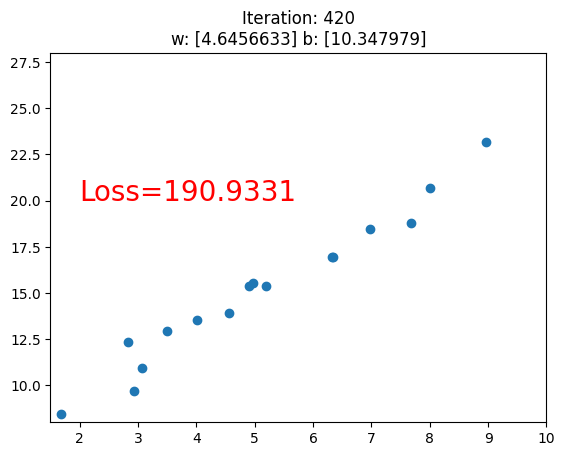

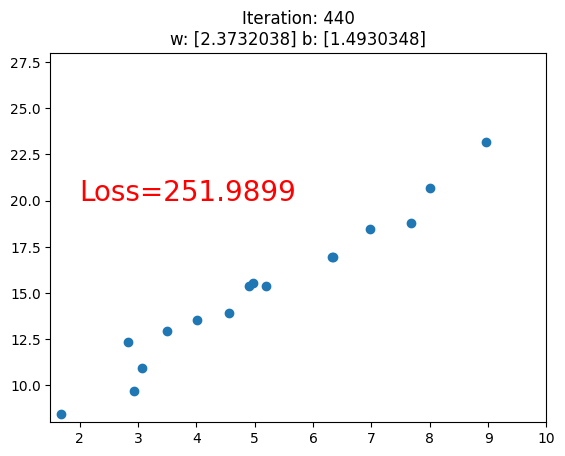

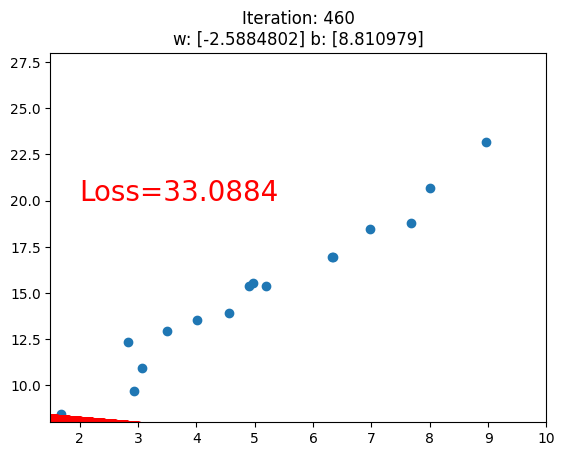

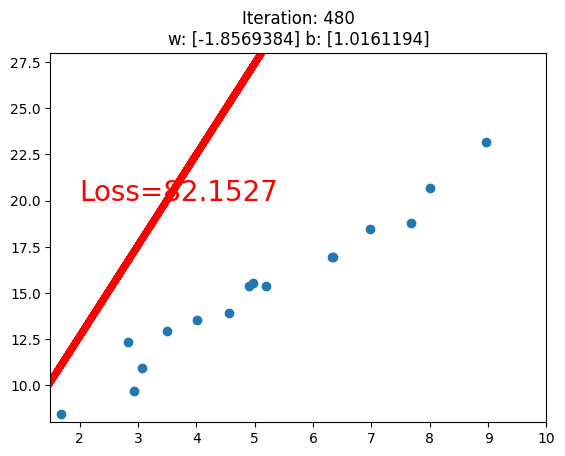

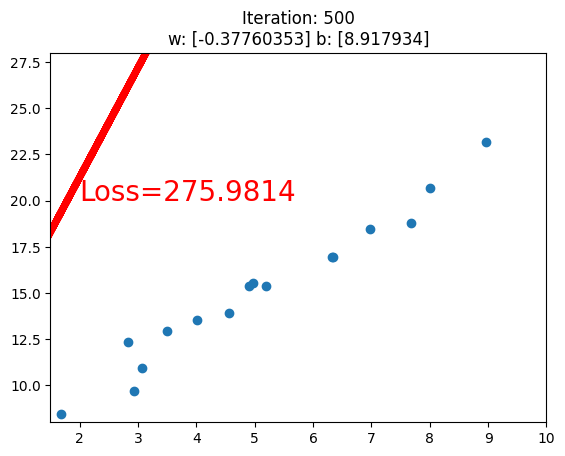

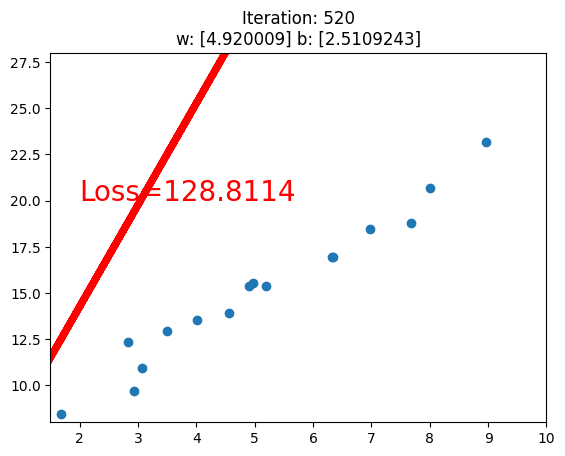

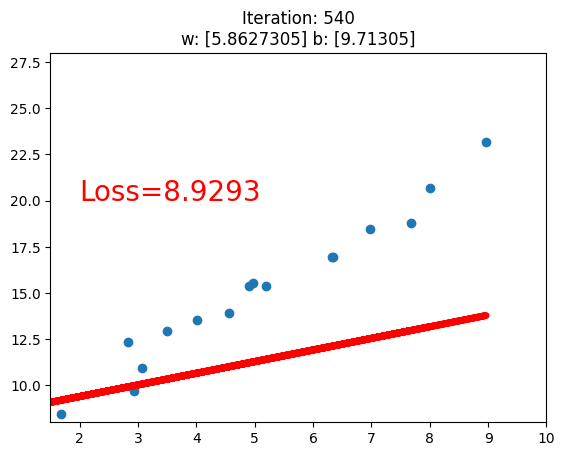

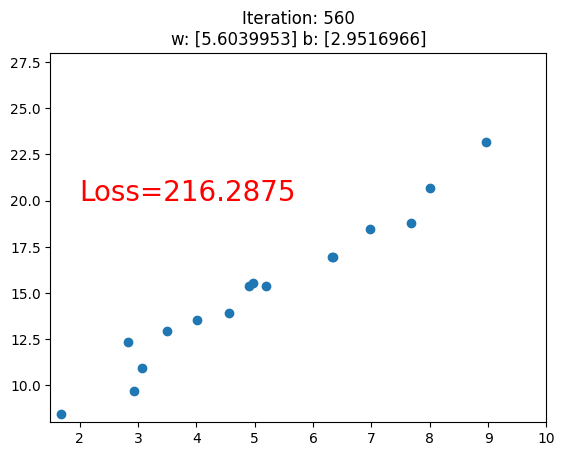

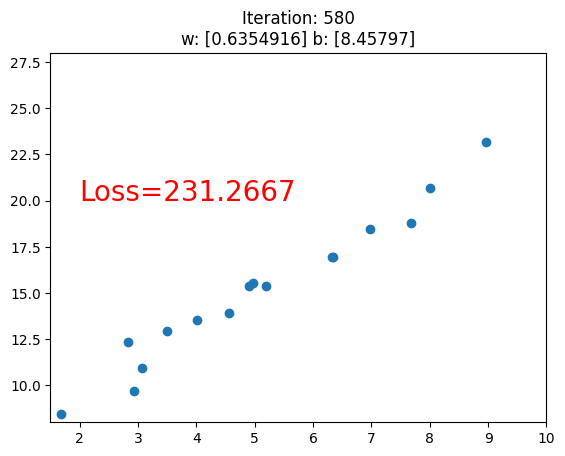

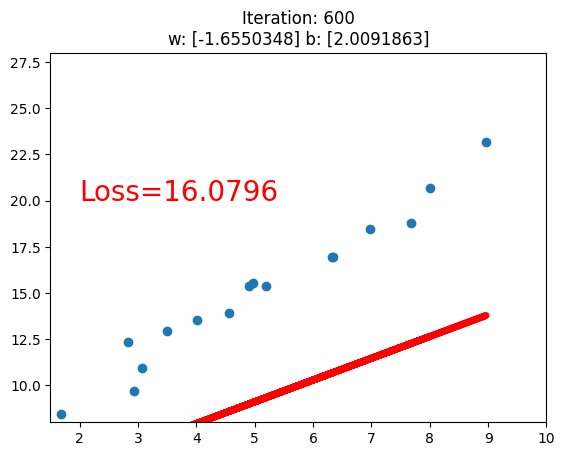

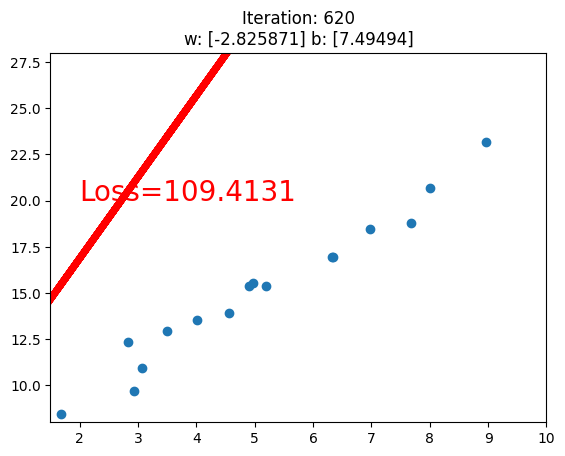

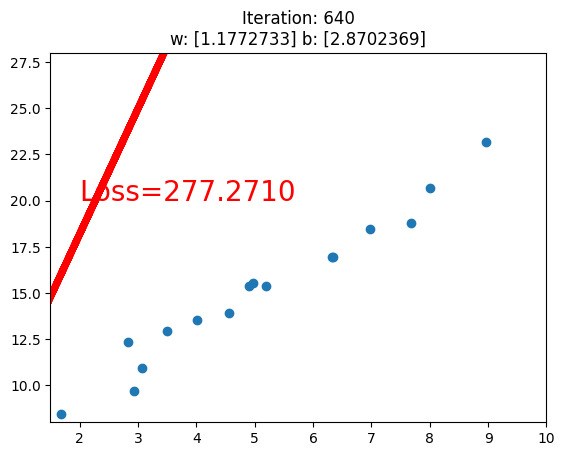

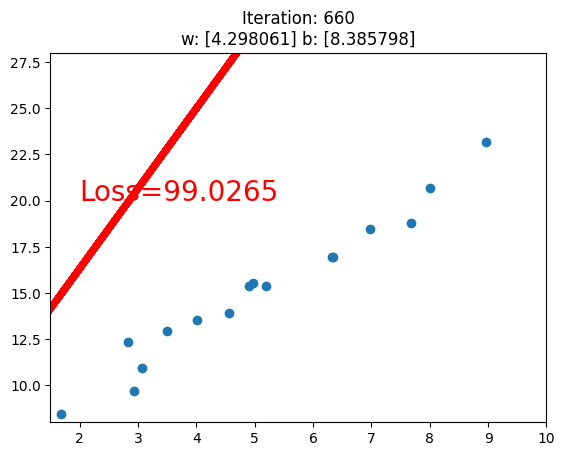

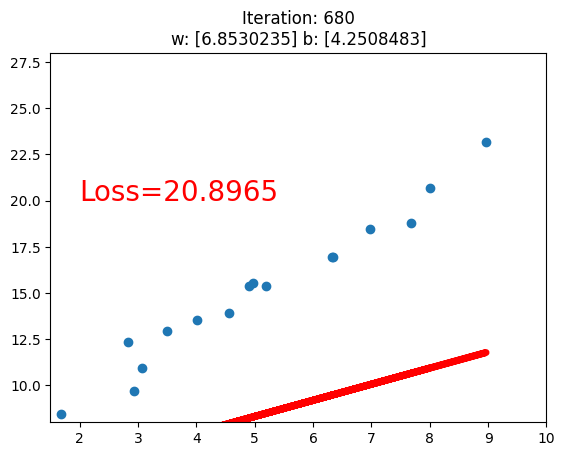

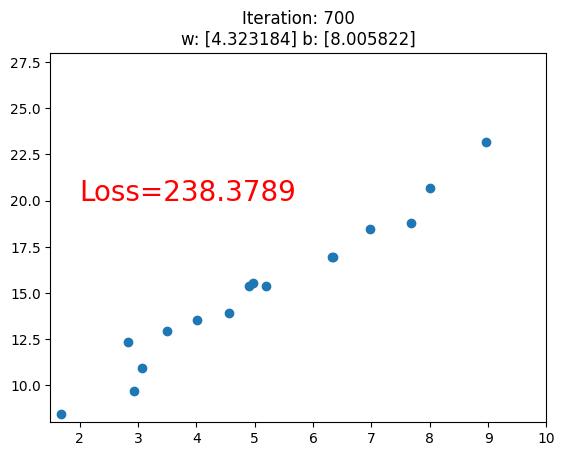

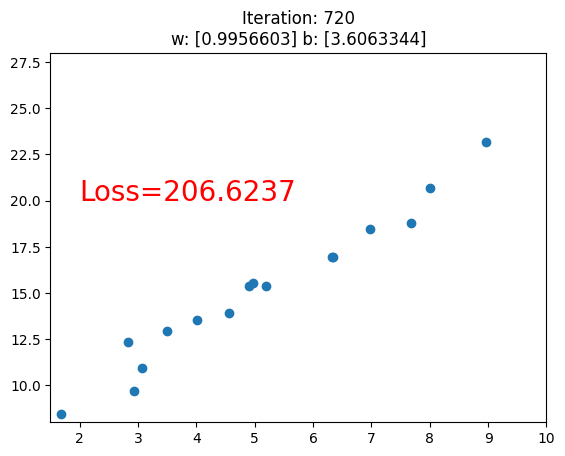

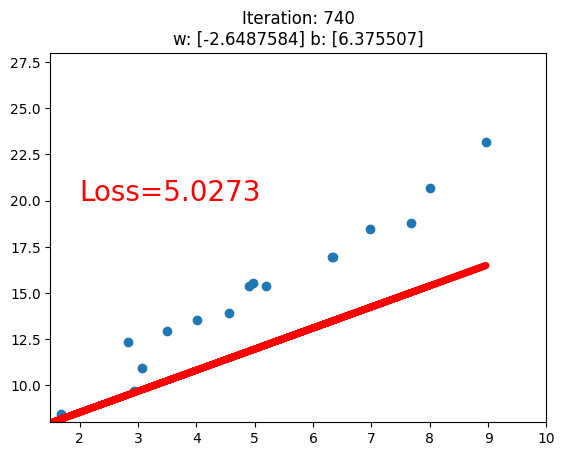

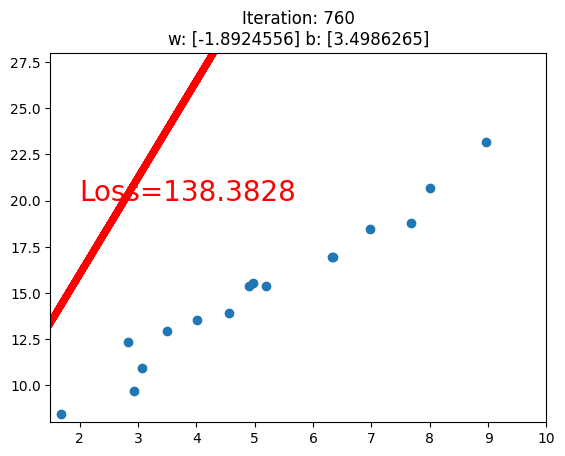

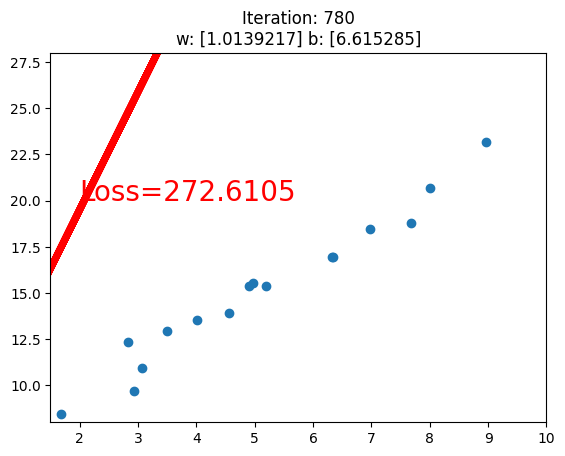

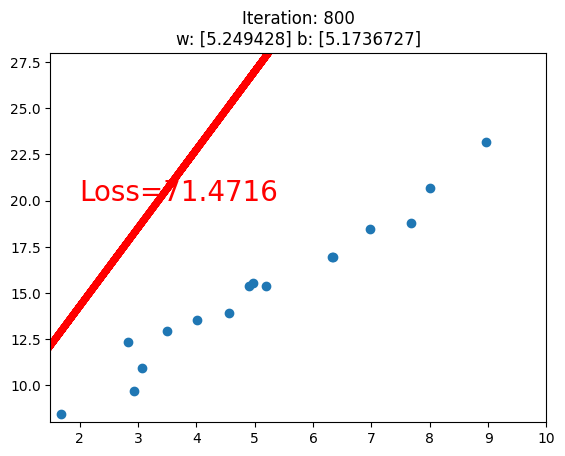

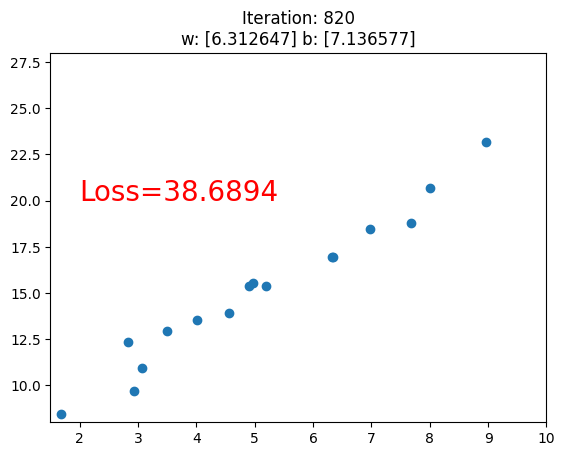

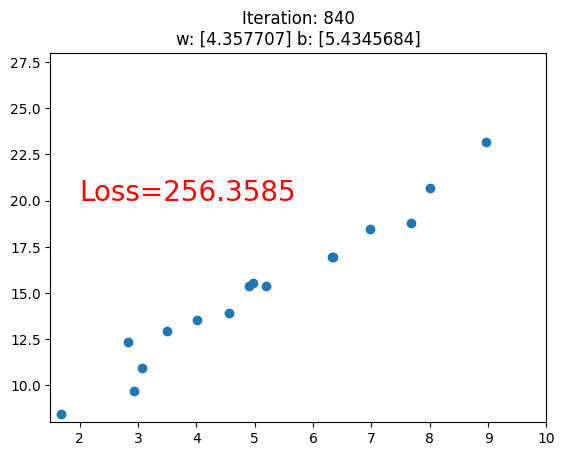

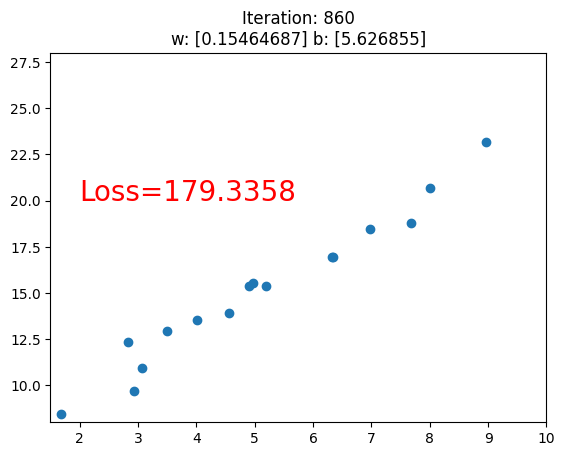

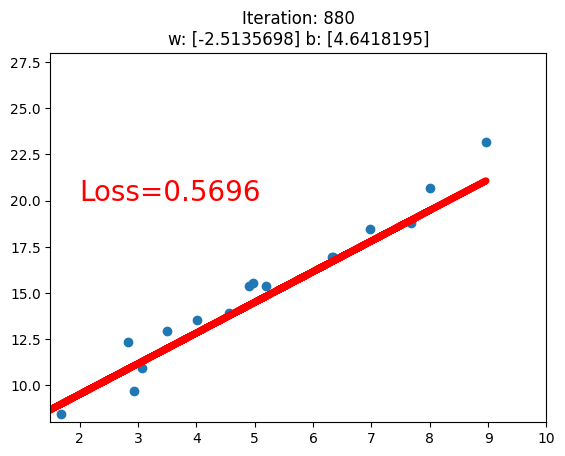

In [15]:
import matplotlib.pyplot as plt
torch.manual_seed(0)    # 为了保证随机数的可重复性
lr = 0.1

# 生成输入数据
x = torch.rand((20, 1)) * 10
y = 2*x + (5 + torch.randn(20, 1))

# 初始化权重和偏置
w = torch.randn((1), requires_grad=True)
b = torch.zeros((1), requires_grad=True)

for iteration in range(1000):
    wx = torch.mul(w, x)
    y_pred = torch.add(wx, b)
    loss = (0.5 * (y - y_pred) ** 2).mean()
    loss.backward()
    b.data.sub_(lr * b.grad)
    w.data.sub_(lr * w.grad)

    # 绘图
    if iteration % 20 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r-', lw=5)
        plt.text(2, 20, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color': 'red'})
        plt.xlim(1.5, 10)
        plt.ylim(8, 28)
        plt.title("Iteration: {}\nw: {} b: {}".format(iteration, w.data.numpy(), b.data.numpy()))
        plt.pause(0.5)

        if loss.data.numpy() < 1:
            break